Essa Rokhmania Ulul Azmy / 210312625311

### UTS KECERDASAN BUATAN

Data yang digunakan adalah https://www.kaggle.com/datasets/vanthanadevi08/hotel-reservation-dataset

### Jelaskan latar belakang alasan pemilihan data tersebut!
Alasan saya memilih data ini karena dataset ini memberikan informasi tentang fitur-fitur yang dapat memengaruhi keputusan reservasi di hotel. Dengan dataset tersebut, kita bisa memprediksi apakah seseorang akan membatalkan reservasi atau tidak. Selain itu, dataset ini sesuai dengan model-model yang pernah saya pelajari dan  hasil analisisnya memiliki potensi untuk diterapkan dalam skenario bisnis sebenarnya.

Membaca data

In [100]:
import pandas as pd
file_path = "C:/Users/ASUS/Downloads/Data UTS Essa.xlsx"
df = pd.read_excel(file_path)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,10668,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,945,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,1678,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,9095,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,9839,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,945,0,Canceled


Menampilkan banyak data

In [101]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]
print("Banyak data: ", len(X))

Banyak data:  36275


Menampilkan 10 data pertama

In [102]:
print("10 data pertama: ")
print(X[:10])

10 data pertama: 
  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1   

Eksplorasi data

In [103]:
print("Informasi data:")
print(df.info()) 

Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Booking_ID                            36275 non-null  object
 1   no_of_adults                          36275 non-null  int64 
 2   no_of_children                        36275 non-null  int64 
 3   no_of_weekend_nights                  36275 non-null  int64 
 4   no_of_week_nights                     36275 non-null  int64 
 5   type_of_meal_plan                     36275 non-null  object
 6   required_car_parking_space            36275 non-null  int64 
 7   room_type_reserved                    36275 non-null  object
 8   lead_time                             36275 non-null  int64 
 9   arrival_year                          36275 non-null  int64 
 10  arrival_month                         36275 non-null  int64 
 11  arrival_date

In [104]:
print("\nJumlah Missing Values per Fitur:")
df.isnull().sum()


Jumlah Missing Values per Fitur:


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [105]:
#ubah kolom dengan data types object menjadi numerik

df['type_of_meal_plan'],_ = pd.factorize(df['type_of_meal_plan'])
df['room_type_reserved'],_ = pd.factorize(df['room_type_reserved'])
df['market_segment_type'],_ = pd.factorize(df['market_segment_type'])
df['booking_status'],_ = pd.factorize(df['booking_status'])
df.head

<bound method NDFrame.head of       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                      2      

In [106]:
#cek data types setelah data diencode

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Booking_ID                            36275 non-null  object
 1   no_of_adults                          36275 non-null  int64 
 2   no_of_children                        36275 non-null  int64 
 3   no_of_weekend_nights                  36275 non-null  int64 
 4   no_of_week_nights                     36275 non-null  int64 
 5   type_of_meal_plan                     36275 non-null  int64 
 6   required_car_parking_space            36275 non-null  int64 
 7   room_type_reserved                    36275 non-null  int64 
 8   lead_time                             36275 non-null  int64 
 9   arrival_year                          36275 non-null  int64 
 10  arrival_month                         36275 non-null  int64 
 11  arrival_date                

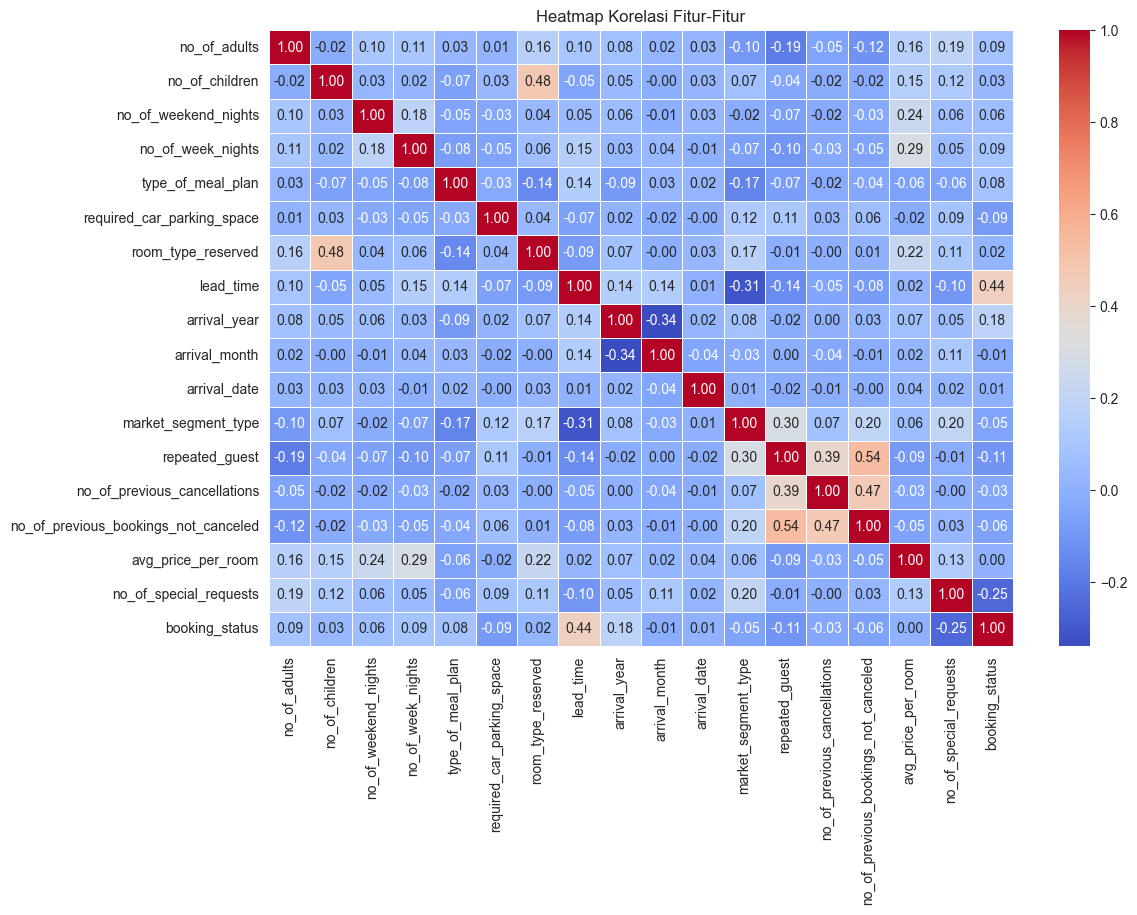

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
df1 = df.drop(columns=['Booking_ID'])
df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur")
plt.show()

In [108]:
selected_features = ['no_of_adults', 'no_of_week_nights', 'no_of_previous_cancellations', 'lead_time', 'arrival_year', 'repeated_guest', 'no_of_special_requests']  
X_new = X[selected_features]
y_new = df['booking_status']

Berdasarkan heatmap di atas, fitur-fitur yang dipilih adalah no_of_adults, no_of_week_nights, no_of_previous_cancellations, lead_time, arrival_year, repeated_guest, no_of_special_requests

Deskripsi statistika data

In [109]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.324052,0.030986,0.337174,85.232557,2017.820427,7.423653,15.596995,0.804604,0.025637,0.023349,0.153411,2768.542908,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.634113,0.173281,0.775888,85.930817,0.383836,3.069894,8.740447,0.646881,0.158053,0.368331,1.754171,4406.419995,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,765.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,1692.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,34963.000000,5.000000,1.000000


Visualisasi fitur dalam data

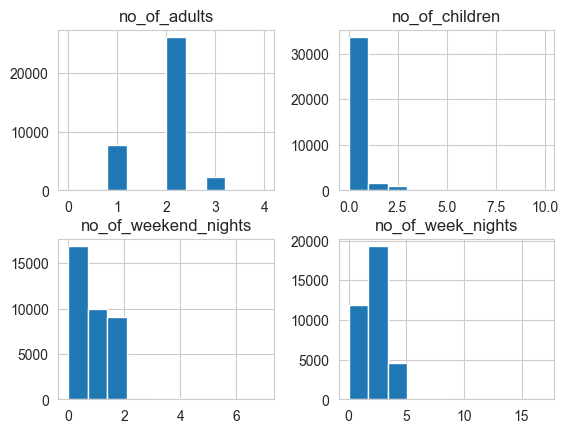

In [110]:
import matplotlib.pyplot as plt
viz1 = df[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights']]
viz1.hist()
plt.show()

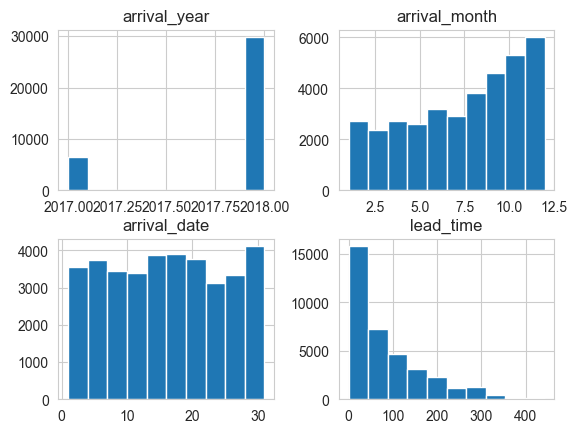

In [111]:
import matplotlib.pyplot as plt
viz2 = df[['arrival_year','arrival_month','arrival_date','lead_time']]
viz2.hist()
plt.show()

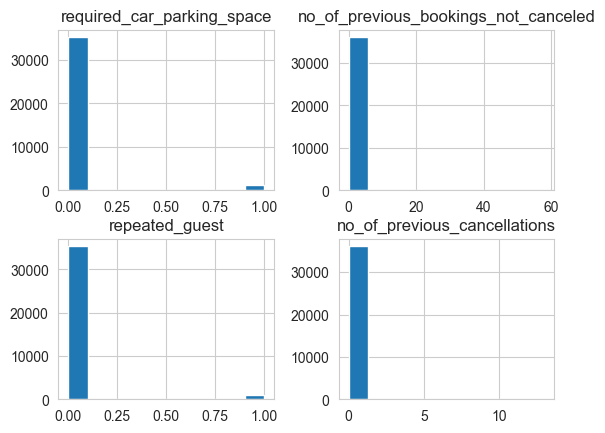

In [112]:
import matplotlib.pyplot as plt
viz3 = df[['required_car_parking_space','no_of_previous_bookings_not_canceled','repeated_guest','no_of_previous_cancellations']]
viz3.hist()
plt.show()

### Pembagian data

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, shuffle=False)

In [114]:
print("Banyak data training: ", len(X_train))
print("Banyak data testing: ", len(X_test))

Banyak data training:  25392
Banyak data testing:  10883


Jelaskan alasan rasio training dan testing yang dipilih?
Karena pembagian data 'pas' antara pelatihan model dan evaluasi kinerja. Jika rasio data pelatihan terlalu besar ( 80:20 atau 90:10), berisiko kekurangan data pengujian. Sebaliknya, jika data pelatihan terlalu sedikit (misalnya, 60:40), model mungkin tidak cukup belajar.

### Implementasi metode machine learning

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn import metrics 

1. Dessicion Tree

In [116]:
#Default Parameter
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

print("Testing Accuracy of Decision Tree : ",metrics.accuracy_score(y_test,Y_pred_dt))

Testing Accuracy of Decision Tree :  0.8032711568501333


In [117]:
#Parameter Diubah
dt2 = DecisionTreeClassifier(
    criterion='log_loss',  
    max_depth=11,   
    min_samples_split=5,
    min_samples_leaf=3,     
    max_features=10)

dt2.fit(X_train,y_train)
Y_pred_dt2 = dt2.predict(X_test)

print("Testing Accuracy of Decision Tree : ",metrics.accuracy_score(y_test,Y_pred_dt))

Testing Accuracy of Decision Tree :  0.8032711568501333


In [118]:
fn = df.columns.tolist()
cn = ['Canceled', 'Not_Canceled']
cn = y.unique().astype(str)

[Text(0.6240172024579075, 0.9848484848484849, 'no_of_weekend_nights <= 151.5\ngini = 0.44\nsamples = 25392\nvalue = [17088, 8304]\nclass = Not_Canceled'),
 Text(0.4003785492540591, 0.9545454545454546, 'required_car_parking_space <= 0.5\ngini = 0.353\nsamples = 20370\nvalue = [15703, 4667]\nclass = Not_Canceled'),
 Text(0.5121978758559833, 0.9696969696969697, 'True  '),
 Text(0.13805560122588598, 0.9242424242424242, 'no_of_weekend_nights <= 20.5\ngini = 0.443\nsamples = 10582\nvalue = [7082.0, 3500.0]\nclass = Not_Canceled'),
 Text(0.034118274166909386, 0.8939393939393939, 'no_of_week_nights <= 2017.5\ngini = 0.299\nsamples = 3581\nvalue = [2926, 655]\nclass = Not_Canceled'),
 Text(0.01391904534943247, 0.8636363636363636, 'no_of_adults <= 8.5\ngini = 0.101\nsamples = 938\nvalue = [888, 50]\nclass = Not_Canceled'),
 Text(0.013636604353121856, 0.8333333333333334, 'no_of_weekend_nights <= 3.5\ngini = 0.097\nsamples = 936\nvalue = [888, 48]\nclass = Not_Canceled'),
 Text(0.00709633003230418

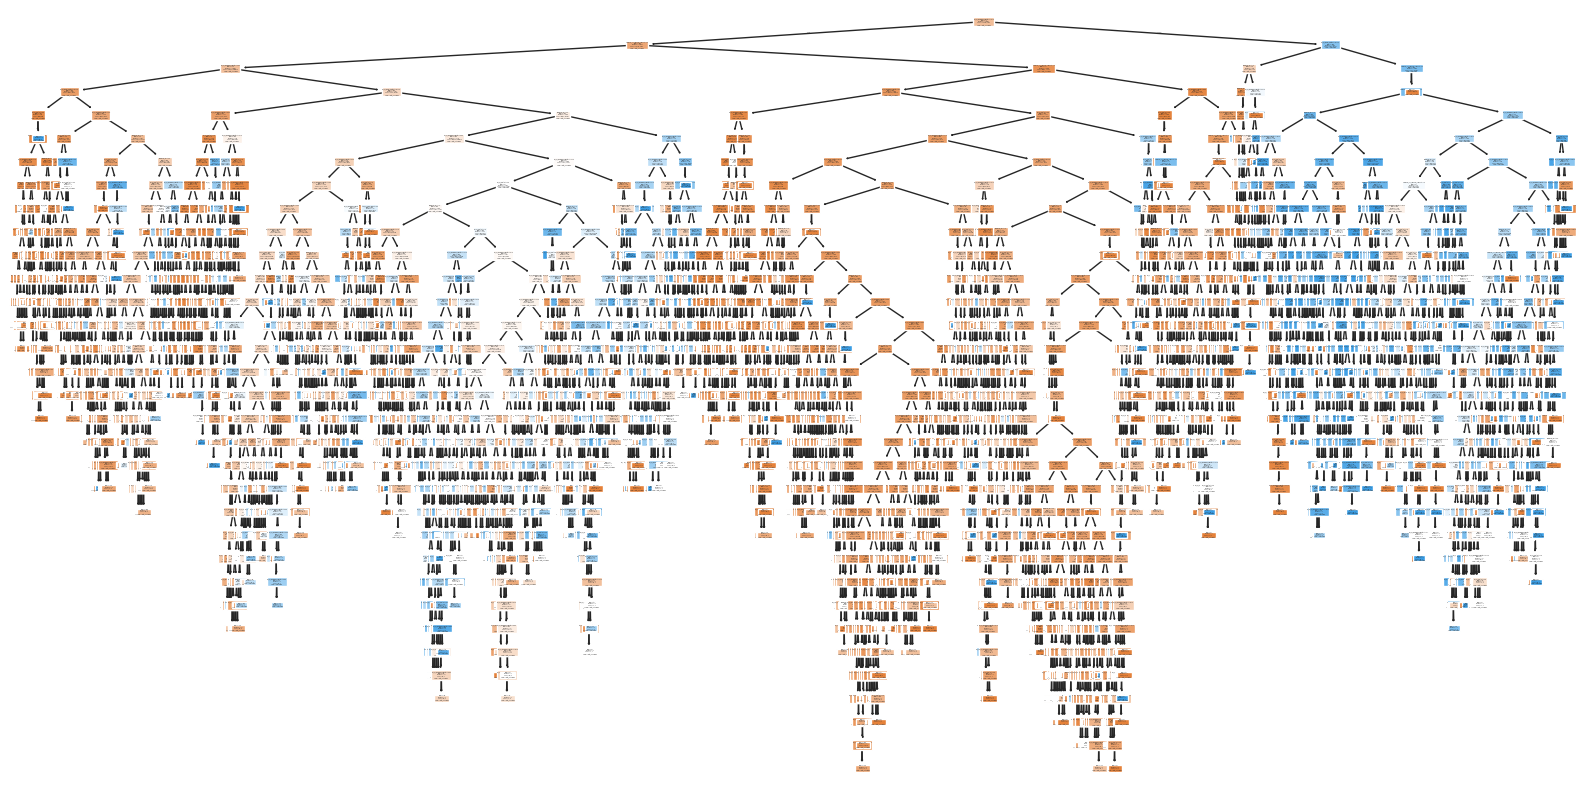

In [119]:
fig1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
tree.plot_tree(dt,
               feature_names=fn,
               class_names=cn,
               filled=True)

2. KNN

In [120]:
#Default Parameter
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

Akurasi dengan menggunakan Nearest Neighbor:  0.7966553340071671


In [121]:
#Parameter Diubah
knn2 = KNeighborsClassifier(n_neighbors=20, weights='distance', algorithm='auto')

knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred2)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

Akurasi dengan menggunakan Nearest Neighbor:  0.8045575668473767


3. Naive Bayes

In [122]:
#Default Parameter
nb = naive_bayes.MultinomialNB()

nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred_nb)
print("Akurasi dengan menggunakan Naive Bayes Multinomial: ", score)

Akurasi dengan menggunakan Naive Bayes Multinomial:  0.7209409170265552


In [123]:
#Parameter Diubah
nb2 = naive_bayes.MultinomialNB(alpha=0.5, force_alpha=False, fit_prior=False)

nb2.fit(X_train, y_train)
y_pred_nb2 = nb2.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred_nb2)
print("Akurasi dengan menggunakan Naive Bayes Multinomial: ", score)

Akurasi dengan menggunakan Naive Bayes Multinomial:  0.7209409170265552


In [124]:
#Default Parameter
nb3 = naive_bayes.BernoulliNB()

nb3.fit(X_train, y_train)
y_pred_nb3 = nb3.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred_nb3)
print("Akurasi dengan menggunakan Naive Bayes Bernoulli: ", score)

Akurasi dengan menggunakan Naive Bayes Bernoulli:  0.6709546999908114


In [125]:
#Parameter Diubah
nb4 = naive_bayes.BernoulliNB(alpha=0.5, force_alpha=False, fit_prior=False)

nb4.fit(X_train, y_train)
y_pred_nb4 = nb4.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred_nb4)
print("Akurasi dengan menggunakan Naive Bayes Bernoulli: ", score)

Akurasi dengan menggunakan Naive Bayes Bernoulli:  0.6264816686575393


In [126]:
#Default Parameter
nb5 = naive_bayes.ComplementNB()

nb5.fit(X_train, y_train)
y_pred_nb5 = nb5.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred_nb5)
print("Akurasi dengan menggunakan Naive Bayes Complement: ", score)

Akurasi dengan menggunakan Naive Bayes Complement:  0.7209409170265552


In [127]:
#Parameter Diubah
nb6 = naive_bayes.ComplementNB(alpha=0.5, force_alpha=False, fit_prior=False)

nb6.fit(X_train, y_train)
y_pred_nb6 = nb6.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred_nb6)
print("Akurasi dengan menggunakan Naive Bayes Complement: ", score)

Akurasi dengan menggunakan Naive Bayes Complement:  0.7209409170265552


In [128]:
#Default Parameter
nb7 = naive_bayes.GaussianNB()

nb7.fit(X_train, y_train)
y_pred_nb7 = nb7.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred_nb7)
print("Akurasi dengan menggunakan Naive Bayes Gaussian: ", score)

Akurasi dengan menggunakan Naive Bayes Gaussian:  0.570155288063953


In [129]:
#Parameter Diubah
nb8 = naive_bayes.GaussianNB(priors=[0.4, 0.6], var_smoothing=1e-5)

nb8.fit(X_train, y_train)
y_pred_nb8 = nb8.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred_nb8)
print("Akurasi dengan menggunakan Naive Bayes Gaussian: ", score)

Akurasi dengan menggunakan Naive Bayes Gaussian:  0.6084719286961315


Jelaskan alasan pemilihan metode machice learning tersebut?
Karena ketiga model tersebut sudah memiliki banyak library yang menyediakan implementasi siap pakai sehingga memudahkan untuk menguji dan membandingkan model dengan cepat. Selain itu, dataset yang saya pilih cocok dengan model-model tersebut.

### Evaluasi

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [131]:
accuracy = accuracy_score(y_test, Y_pred_dt)
precision = precision_score(y_test, Y_pred_dt, pos_label=1)
recall = recall_score(y_test, Y_pred_dt, pos_label=1)
f1 = f1_score(y_test, Y_pred_dt, pos_label=1)

print("Evaluasi Desicion Tree (default parameter):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi Desicion Tree (default parameter):
Akurasi: 0.8032711568501333
Precision: 0.7474226804123711
Recall: 0.6073722423903938
F1-Score: 0.6701586812509629


In [132]:
accuracy = accuracy_score(y_test, Y_pred_dt2)
precision = precision_score(y_test, Y_pred_dt2, pos_label=1)
recall = recall_score(y_test, Y_pred_dt2, pos_label=1)
f1 = f1_score(y_test, Y_pred_dt2, pos_label=1)

print("Evaluasi Desicion Tree (parameter diubah):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi Desicion Tree (parameter diubah):
Akurasi: 0.7953689240099238
Precision: 0.7597851112816577
Recall: 0.5529181792795309
F1-Score: 0.6400517213512203


Decision Tree menunjukkan performa yang baik dengan akurasi di atas 80%. Precision meningkat setelah parameter diubah, namun recall dan f1-score menurun.

In [133]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print("Evaluasi KNN (parameter default):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi KNN (parameter default):
Akurasi: 0.7966553340071671
Precision: 0.7185303514376997
Recall: 0.628036861211952
F1-Score: 0.6702428848159738


In [134]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, pos_label=1)
recall = recall_score(y_test, y_pred2, pos_label=1)
f1 = f1_score(y_test, y_pred2, pos_label=1)

print("Evaluasi KNN (parameter diubah):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi KNN (parameter diubah):
Akurasi: 0.8045575668473767
Precision: 0.7481228668941979
Recall: 0.6121195196872382
F1-Score: 0.6733220703424974


KNN menunjukkan peningkatan dan penurunan yang tidak jauh berbeda dalam semua metrik evaluasi setelah parameter diubah. 

In [135]:
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, pos_label=1)
recall = recall_score(y_test, y_pred_nb, pos_label=1)
f1 = f1_score(y_test, y_pred_nb, pos_label=1)

print("Evaluasi Naive Bayes Multinomial (parameter default):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi Naive Bayes Multinomial (parameter default):
Akurasi: 0.7209409170265552
Precision: 0.571805702217529
Recall: 0.6048589779391231
F1-Score: 0.5878680960781653


In [136]:
accuracy = accuracy_score(y_test, y_pred_nb2)
precision = precision_score(y_test, y_pred_nb2, pos_label=1)
recall = recall_score(y_test, y_pred_nb2, pos_label=1)
f1 = f1_score(y_test, y_pred_nb2, pos_label=1)

print("Evaluasi Naive Bayes Multinomial (parameter diubah):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi Naive Bayes Multinomial (parameter diubah):


Akurasi: 0.7209409170265552
Precision: 0.5713536201469045
Recall: 0.6082099972074839
F1-Score: 0.5892060056810496


In [146]:
accuracy = accuracy_score(y_test, y_pred_nb3)
precision = precision_score(y_test, y_pred_nb3, pos_label=1, zero_division=1)
recall = recall_score(y_test, y_pred_nb3, pos_label=1, zero_division=1)
f1 = f1_score(y_test, y_pred_nb3, pos_label=1, zero_division=1)

print("Evaluasi Naive Bayes Bernoulli (parameter default):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi Naive Bayes Bernoulli (parameter default):
Akurasi: 0.6709546999908114
Precision: 1.0
Recall: 0.0
F1-Score: 0.0


In [138]:
accuracy = accuracy_score(y_test, y_pred_nb4)
precision = precision_score(y_test, y_pred_nb4, pos_label=1)
recall = recall_score(y_test, y_pred_nb4, pos_label=1)
f1 = f1_score(y_test, y_pred_nb4, pos_label=1)

print("Evaluasi Naive Bayes Bernoulli (parameter diubah):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi Naive Bayes Bernoulli (parameter diubah):
Akurasi: 0.6264816686575393
Precision: 0.4570921985815603
Recall: 0.7199106394861771
F1-Score: 0.5591584426851751


In [139]:
accuracy = accuracy_score(y_test, y_pred_nb5)
precision = precision_score(y_test, y_pred_nb5, pos_label=1)
recall = recall_score(y_test, y_pred_nb5, pos_label=1)
f1 = f1_score(y_test, y_pred_nb5, pos_label=1)

print("Evaluasi Naive Bayes Complement (parameter default):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi Naive Bayes Complement (parameter default):
Akurasi: 0.7209409170265552
Precision: 0.5713536201469045
Recall: 0.6082099972074839
F1-Score: 0.5892060056810496


In [140]:
accuracy = accuracy_score(y_test, y_pred_nb6)
precision = precision_score(y_test, y_pred_nb6, pos_label=1)
recall = recall_score(y_test, y_pred_nb6, pos_label=1)
f1 = f1_score(y_test, y_pred_nb6, pos_label=1)

print("Evaluasi Naive Bayes Complement (parameter diubah):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi Naive Bayes Complement (parameter diubah):
Akurasi: 0.7209409170265552
Precision: 0.5713536201469045
Recall: 0.6082099972074839
F1-Score: 0.5892060056810496


In [141]:
accuracy = accuracy_score(y_test, y_pred_nb7)
precision = precision_score(y_test, y_pred_nb7, pos_label=1)
recall = recall_score(y_test, y_pred_nb7, pos_label=1)
f1 = f1_score(y_test, y_pred_nb7, pos_label=1)

print("Evaluasi Naive Bayes Gaussian (parameter default):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi Naive Bayes Gaussian (parameter default):
Akurasi: 0.570155288063953
Precision: 0.4275716360755315
Recall: 0.9042166992460207
F1-Score: 0.580598888291196


In [142]:
accuracy = accuracy_score(y_test, y_pred_nb8)
precision = precision_score(y_test, y_pred_nb8, pos_label=1)
recall = recall_score(y_test, y_pred_nb8, pos_label=1)
f1 = f1_score(y_test, y_pred_nb8, pos_label=1)

print("Evaluasi Naive Bayes Gaussian (parameter diubah):")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluasi Naive Bayes Gaussian (parameter diubah):
Akurasi: 0.6084719286961315
Precision: 0.45186862967157415
Recall: 0.891371125383971
F1-Score: 0.5997181775481447


Naive Bayes Multinomial menunjukkan hasil yang cukup stabil.

Naive Bayes Bernoulli memiliki akurasi menurun, recall dan f1-score meningkat signifikan setelah parameter diubah.

Naive Bayes Complement tidak menunjukkan perubahan performa dengan walaupun parameter diubah.

Naive Bayes Gaussian menunjukkan akurasi yang sangat rendah pada parameter default, tetapi setelah parameter diubah, akurasi meningkat signifikan.

Kesimpulannya adalah berdasarkan evaluasi model, Decision Tree dengan parameter default dan KNN dengan parameter yang diubah menunjukkan performa terbaik dengan akurasi tertinggi (0.80), diikuti oleh KNN dengan parameter default dan Decision Tree dengan parameter yang diubah (0.79). Di sisi lain, model Naive Bayes, khususnya Gaussian, menunjukkan performa terendah dengan akurasi hanya 0.57. Hasil ini mengindikasikan pentingnya pemilihan model dan pengaturan parameter yang tepat untuk mencapai hasil optimal dalam analisis data.

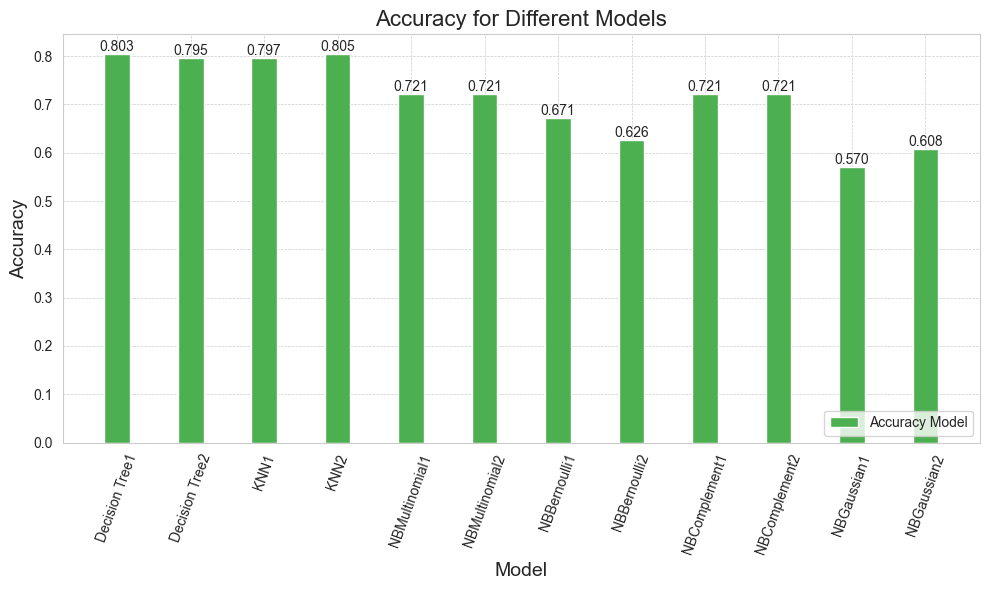

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

models = [
    'Decision Tree1', 'Decision Tree2', 'KNN1', 'KNN2', 
    'NBMultinomial1', 'NBMultinomial2',
    'NBBernoulli1', 'NBBernoulli2',
    'NBComplement1', 'NBComplement2',
    'NBGaussian1', 'NBGaussian2'
]

accuracy_model = [
    accuracy_score(y_test, Y_pred_dt), accuracy_score(y_test, Y_pred_dt2),
    accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred2),
    accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_nb2),
    accuracy_score(y_test, y_pred_nb3), accuracy_score(y_test, y_pred_nb4),
    accuracy_score(y_test, y_pred_nb5), accuracy_score(y_test, y_pred_nb6),
    accuracy_score(y_test, y_pred_nb7), accuracy_score(y_test, y_pred_nb8)
]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))

sns.set_style("whitegrid")
rects1 = plt.bar(x, accuracy_model, width, label='Accuracy Model', color='#4CAF50') 

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy for Different Models', fontsize=16)
plt.xticks(x, models, rotation=70, fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

Berdasarkan akurasinya, model KNN dengan parameter diubah merupakan model dengan akurasi tertinggi, berbeda tipis dengan Decision Tree dengan parameter default dan Naive Bayes Gaussian dengan parameter default merupakan model dengan akurasi terendah.